In [1]:
from tqdm import tqdm

import os
import matplotlib.pyplot as plt

datasets_path = "/home/otokonokage/Documents/github/dataset/computer_vision/"

# **Tiny-Imagenet200**
The dataset contains 200 classes divided uniformly by class.

# **CIFAR-10**

In [2]:
from prepare_dataset import prepare_cifar10
train, validation, weights, num_classes, categories, dataset_name, dataset_type = prepare_cifar10(datasets_path, delete=False)

100%|██████████| 8/8 [00:00<00:00, 22.42it/s]


# **PASCALVOC2007**

In [3]:
from prepare_dataset import prepare_vocdetection

train, validation, weights, num_classes, categories, dataset_name, dataset_type = prepare_vocdetection(datasets_path, "2007", box_format="xywh")

In [4]:
cmap = plt.get_cmap('tab20')

colors = [cmap(i / num_classes) for i in range(num_classes)]

In [5]:
from yolo_tools import intersection_over_union

import torch
elements_per_class_trainset = [0] * num_classes
bboxes_overlay_trainset = []

for (_, bboxes), (_, labels) in tqdm(zip(train["bboxes"].items(), train["labels"].items()), total=len(train["bboxes"]), leave=True):
    for label in labels:
        elements_per_class_trainset[label] += 1

    if len(bboxes) > 1:
        for i in range(len(bboxes) - 1):
            for j in range(i+1, len(bboxes) - 1):
                bboxes_overlay_trainset.append(intersection_over_union(torch.tensor(bboxes[i]), torch.tensor(bboxes[j]), box_format="xywh").item())

elements_per_class_validationset = [0] * num_classes
bboxes_overlay_validationset = []

for (_, bboxes), (_, labels) in tqdm(zip(validation["bboxes"].items(), validation["labels"].items()), total=len(validation["bboxes"]), leave=True):
    for label in labels:
        elements_per_class_validationset[label] += 1

    if len(bboxes) > 1:
        for i in range(len(bboxes) - 1):
            for j in range(i+1, len(bboxes) - 1):
                bboxes_overlay_validationset.append(intersection_over_union(torch.tensor(bboxes[i]), torch.tensor(bboxes[j]), box_format="xywh"))

100%|██████████| 2510/2510 [00:01<00:00, 2273.15it/s]


**Classes Distribution**

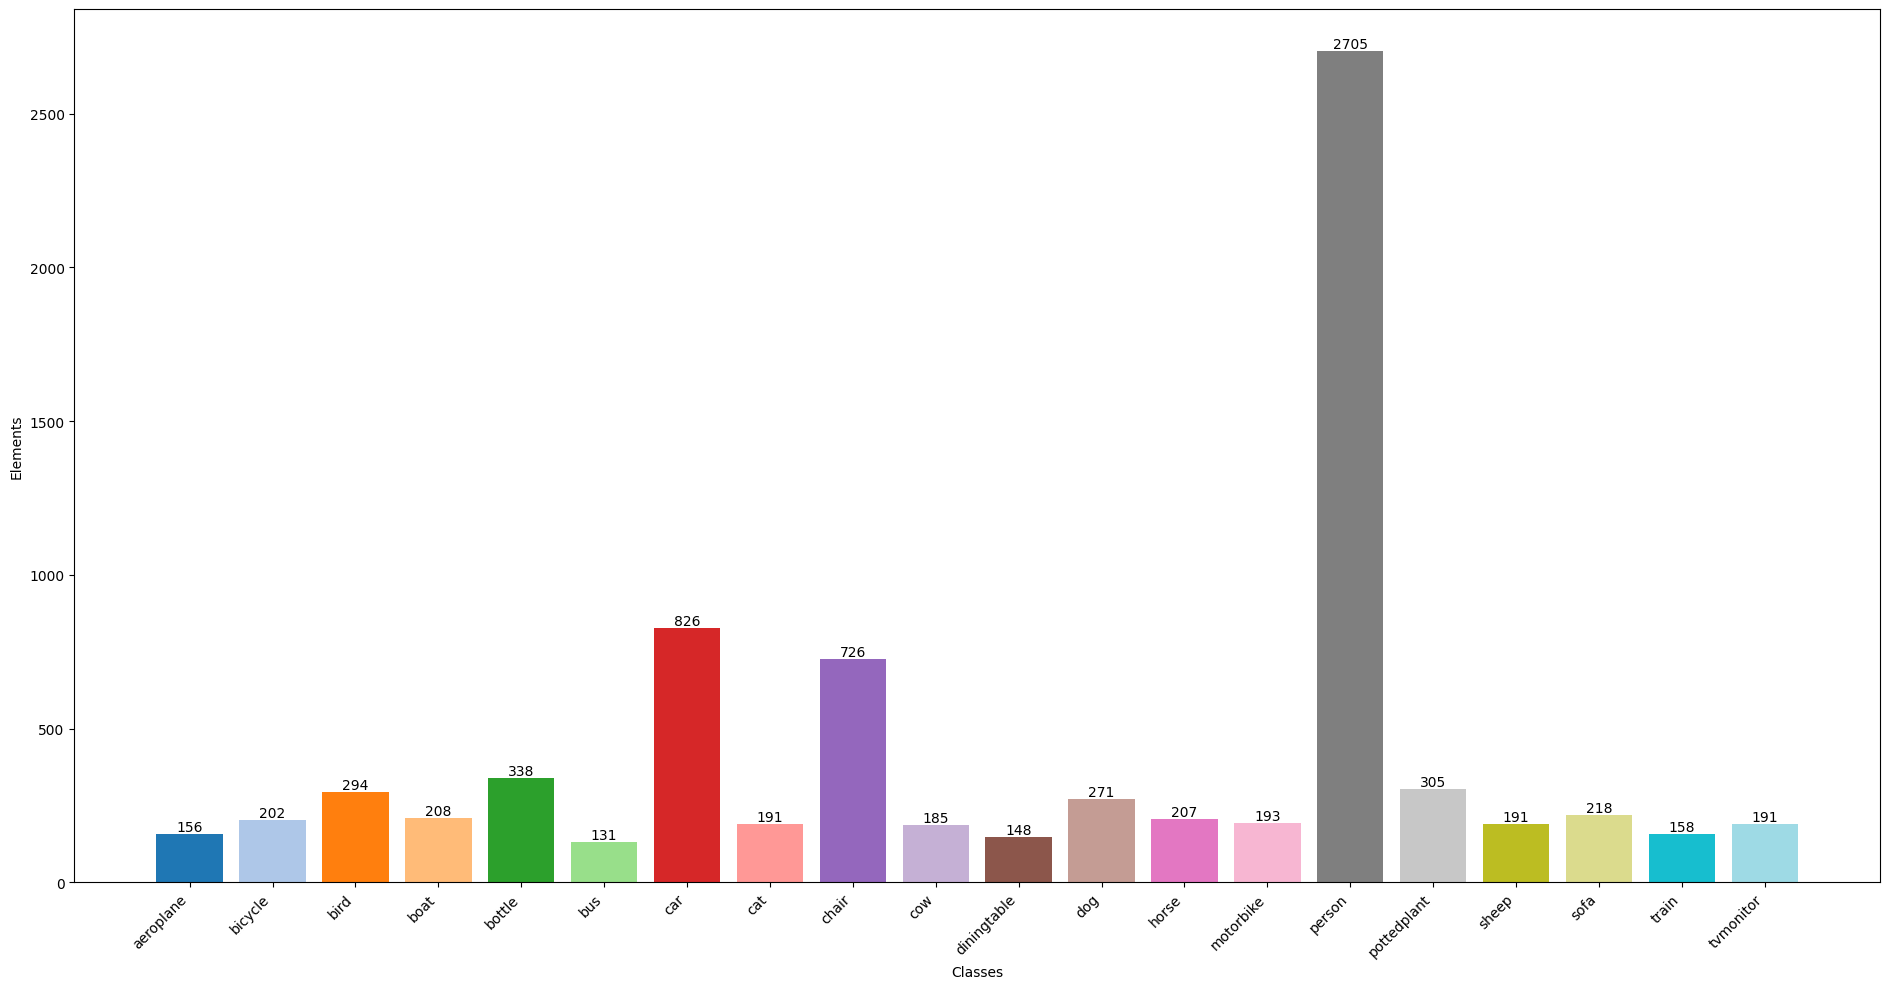

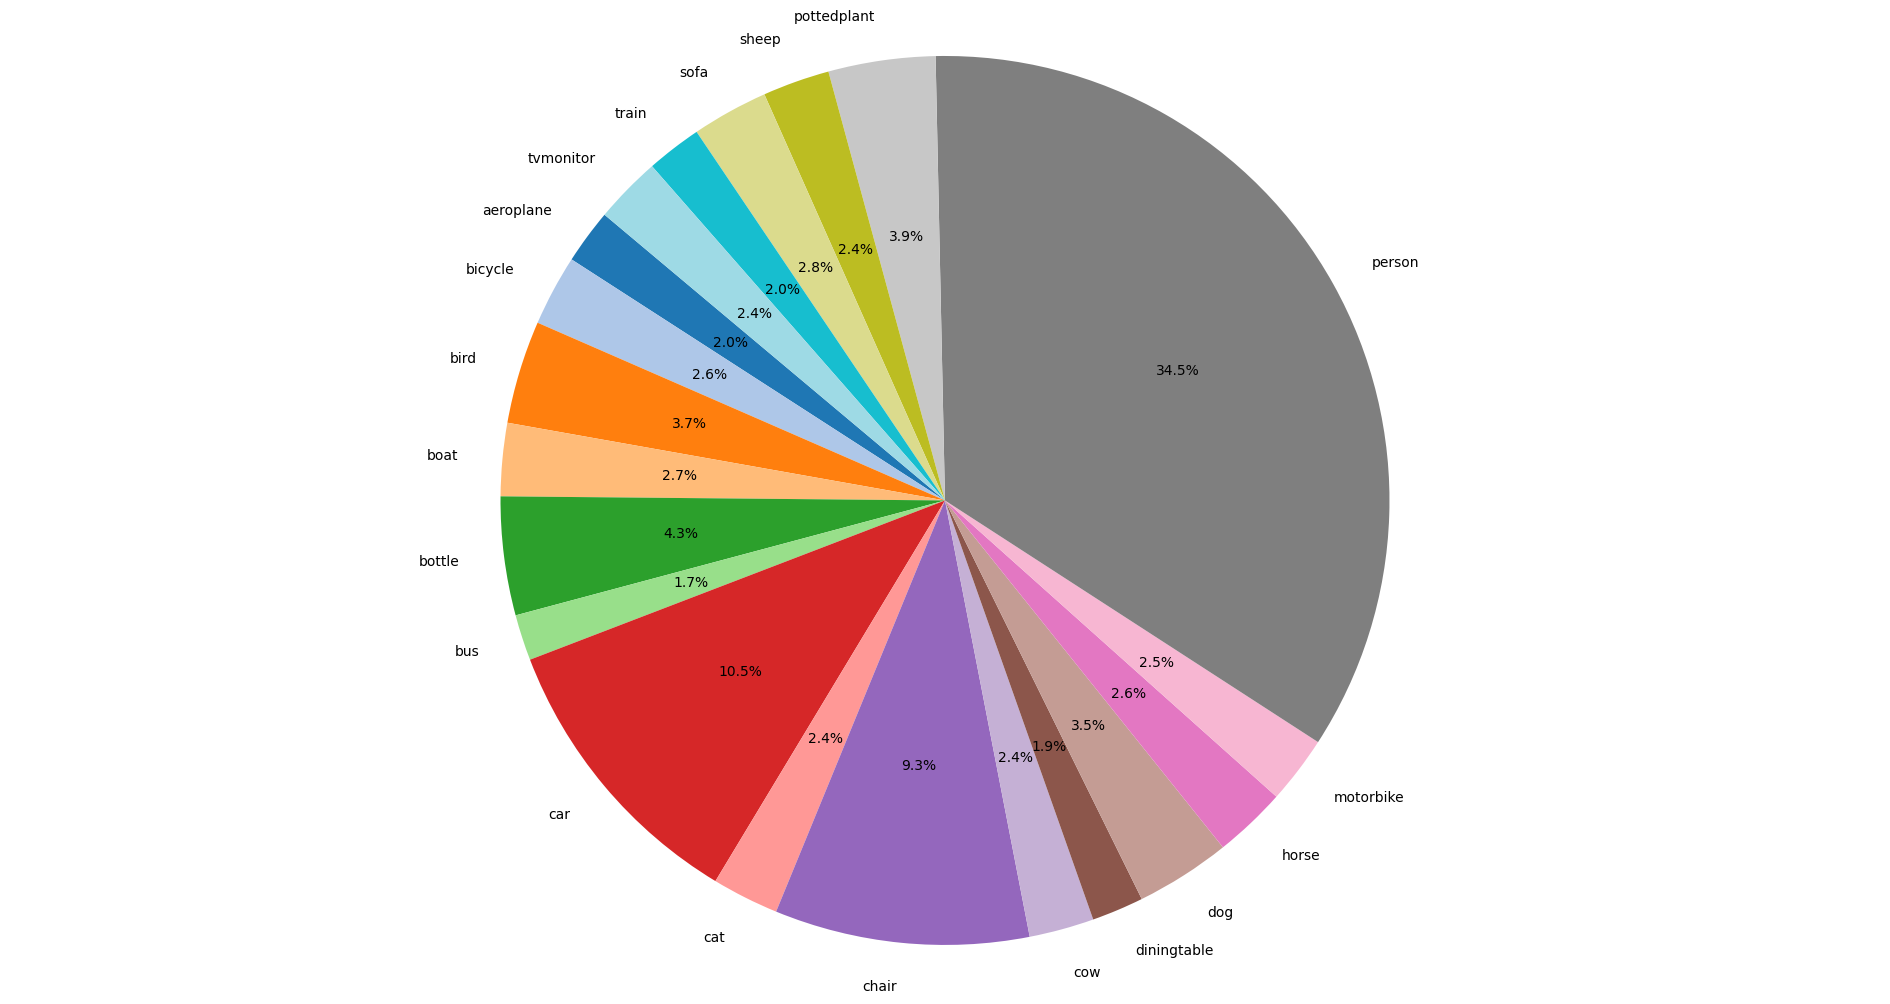

In [6]:
plt.figure(figsize=(19, 10))
barplot = plt.bar(range(len(categories)), elements_per_class_trainset, color=colors)
plt.bar_label(barplot, elements_per_class_trainset)
plt.xlabel('Classes')
plt.ylabel('Elements')
plt.xticks(range(len(categories)), categories, rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(""), "plots", f"Pascalvoc2007_classes_distribution"), pad_inches=0.)
plt.show()

plt.figure(figsize=(19, 10))
plt.pie(elements_per_class_trainset, labels=categories.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(""), "plots", f"Pascalvoc2007_pie_classes_distribution"), pad_inches=0.)
plt.show()

**Boudingboxes Overlay Distribution**

100%|██████████| 14991/14991 [00:00<00:00, 4021027.77it/s]


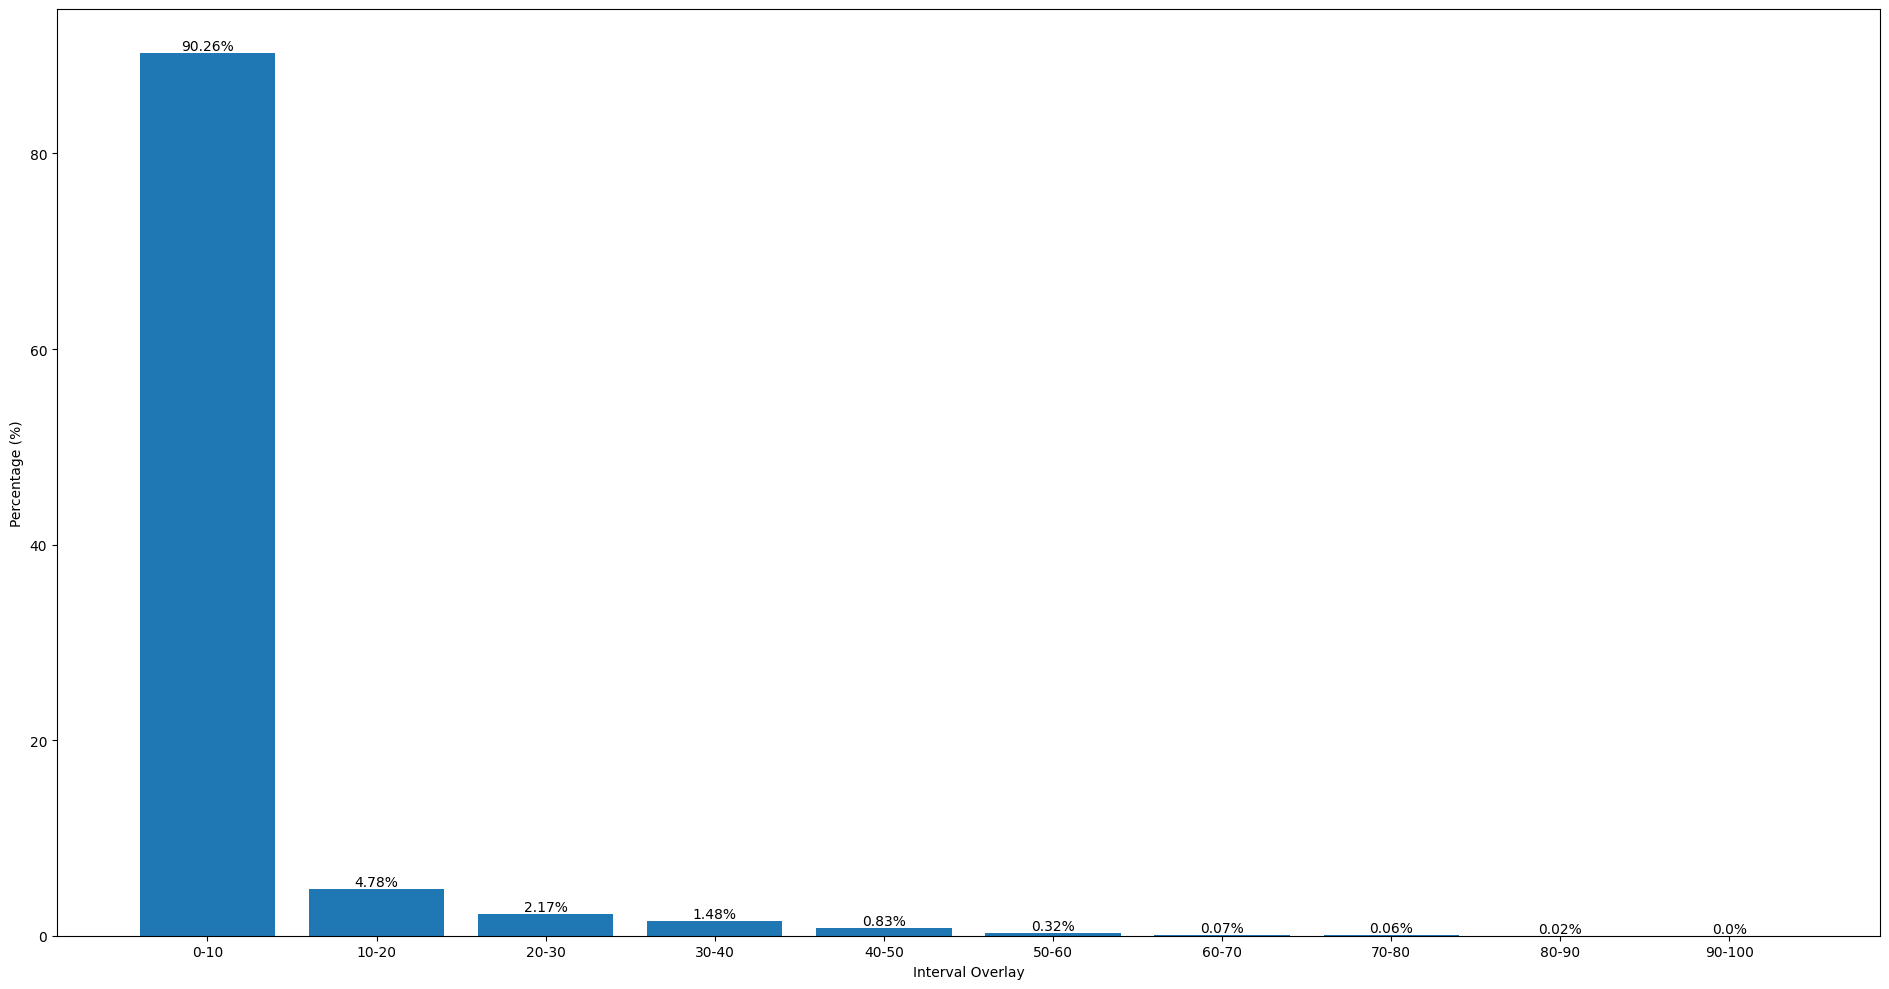

In [7]:
overlay_thresholds = [0] * 10
for iou in tqdm(bboxes_overlay_trainset, total=len(bboxes_overlay_trainset)):
    res = int(iou * 10)
    overlay_thresholds[res] += 1

percentages = [(overlay / len(bboxes_overlay_trainset)) * 100 for overlay in overlay_thresholds]
labels = [f'{i * 10}-{(i+1) * 10}' for i in range(len(overlay_thresholds))]

plt.figure(figsize=(19, 10))
barplot = plt.bar(range(len(overlay_thresholds)), percentages)
plt.bar_label(barplot, [f"{round(p, 2)}%" for p in percentages])
plt.xticks(range(len(overlay_thresholds)), [f'{i * 10}-{(i+1) * 10}' for i in range(len(overlay_thresholds))])
plt.xlabel("Interval Overlay")
plt.ylabel("Percentage (%)")
plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(""), "plots", f"Pascalvoc2007_overlay_bboxes_distribution"), pad_inches=0.)
plt.show()

# **PASCALVOC2012**

In [8]:
from prepare_dataset import prepare_vocdetection

train, validation, weights, num_classes, categories, dataset_name, dataset_type = prepare_vocdetection(datasets_path, "2012", box_format="xywh")

100%|██████████| 17125/17125 [00:11<00:00, 1549.02it/s]


In [9]:
cmap = plt.get_cmap('tab20')

colors = [cmap(i / num_classes) for i in range(num_classes)]

In [10]:
from yolo_tools import intersection_over_union

import torch
elements_per_class_trainset = [0] * num_classes
bboxes_overlay_trainset = []

for (_, bboxes), (_, labels) in tqdm(zip(train["bboxes"].items(), train["labels"].items()), total=len(train["bboxes"]), leave=True):
    for label in labels:
        elements_per_class_trainset[label] += 1

    if len(bboxes) > 1:
        for i in range(len(bboxes) - 1):
            for j in range(i+1, len(bboxes) - 1):
                bboxes_overlay_trainset.append(intersection_over_union(torch.tensor(bboxes[i]), torch.tensor(bboxes[j]), box_format="xywh").item())

100%|██████████| 4323/4323 [00:02<00:00, 1816.15it/s]


**Classes Distribution**

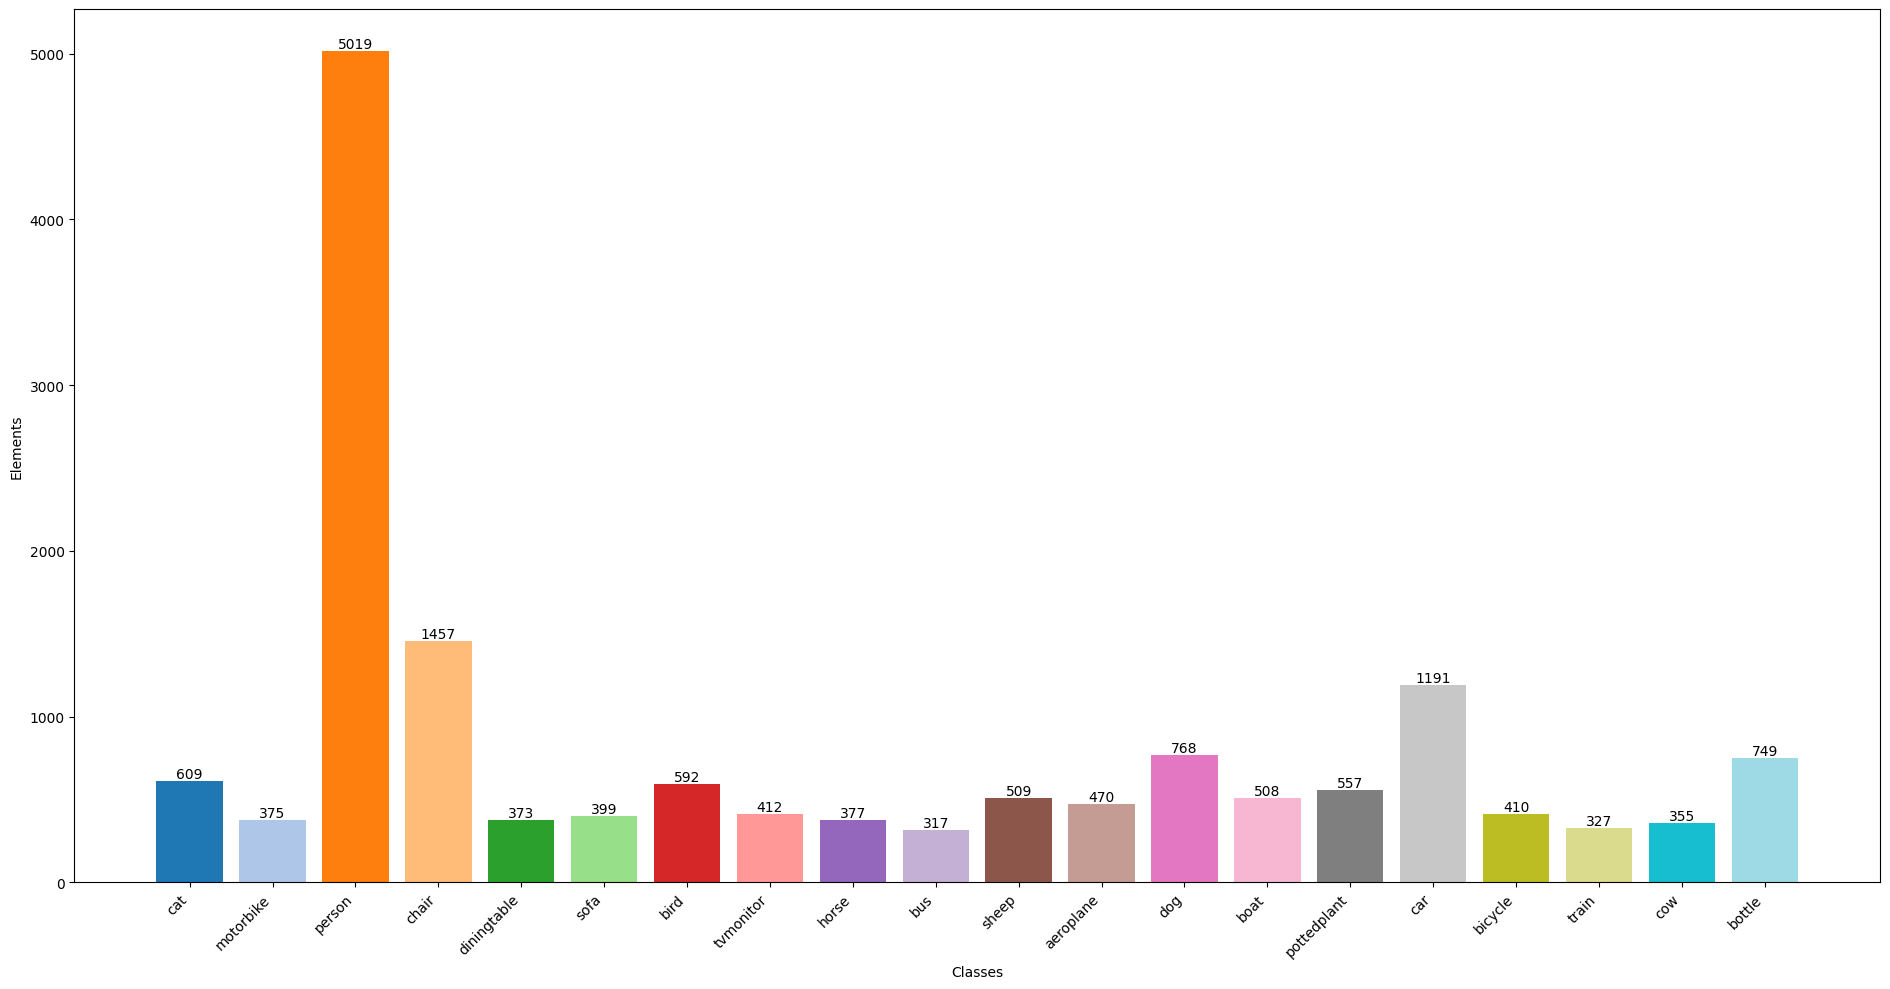

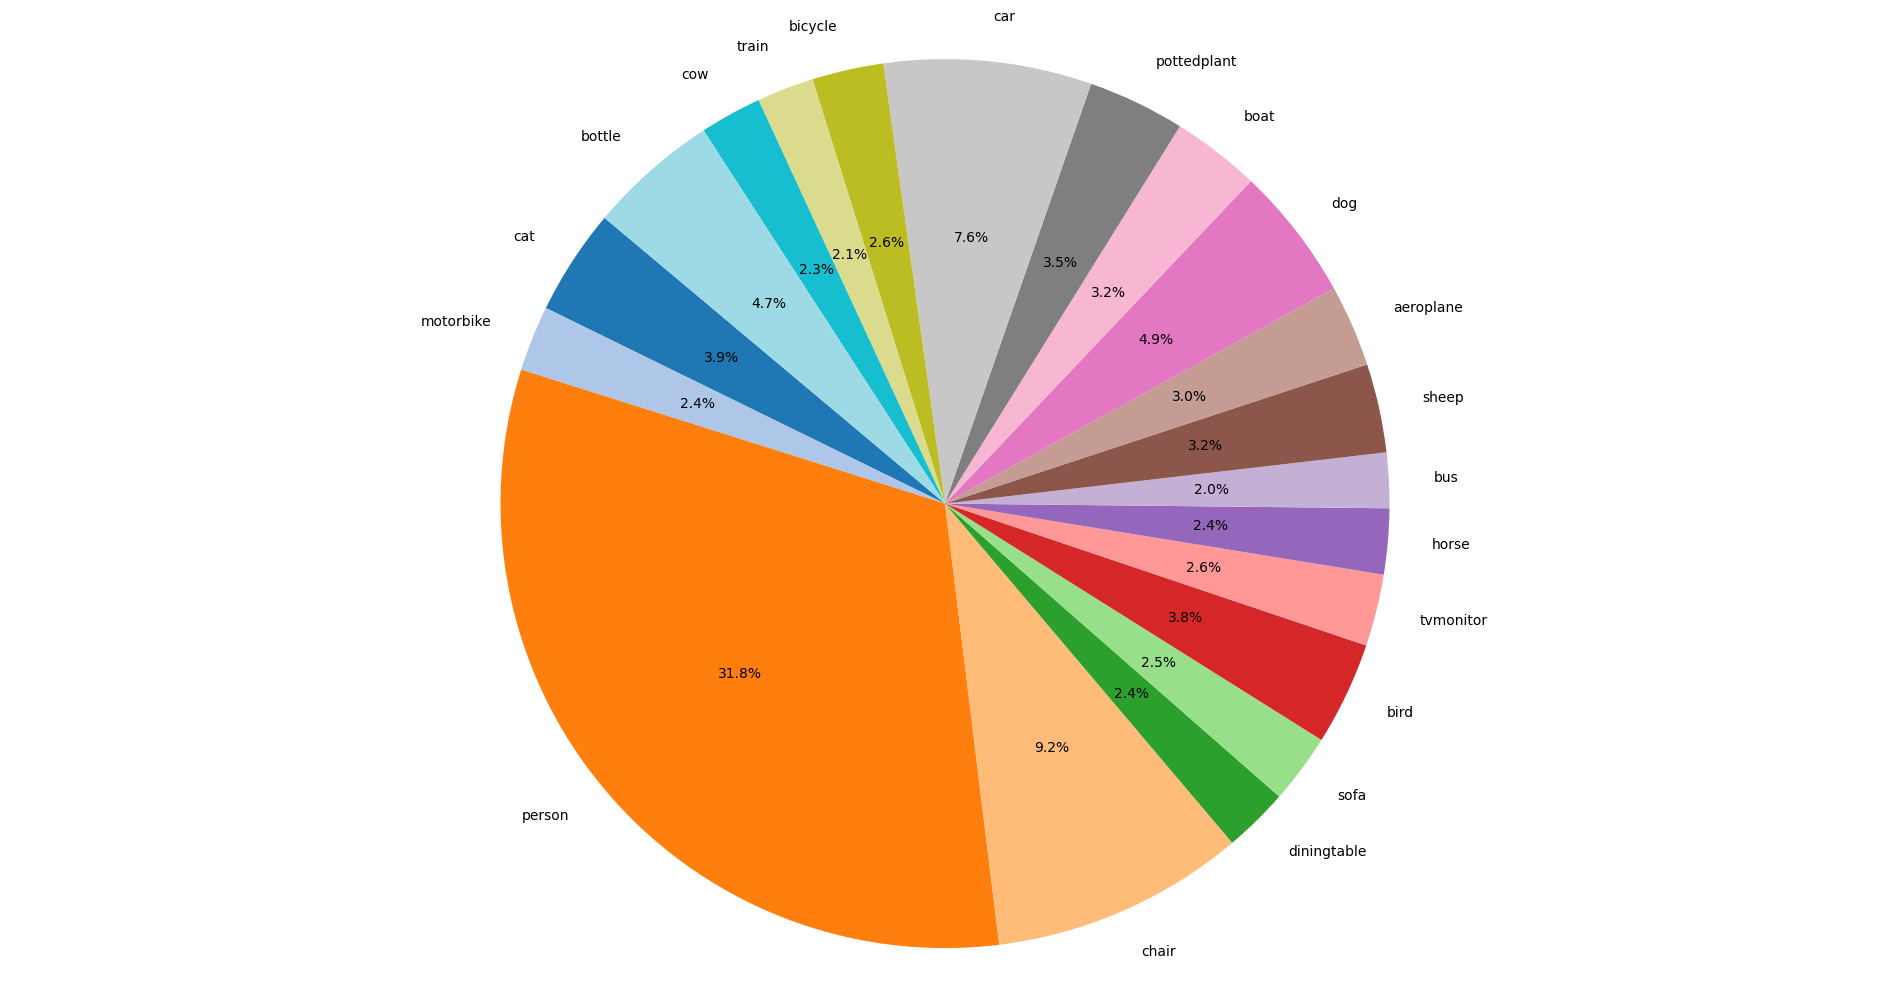

In [11]:
plt.figure(figsize=(19, 10))
barplot = plt.bar(range(len(categories)), elements_per_class_trainset, color=colors)
plt.bar_label(barplot, elements_per_class_trainset)
plt.xlabel('Classes')
plt.ylabel('Elements')
plt.xticks(range(len(categories)), categories, rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(""), "plots", f"Pascalvoc2012_classes_distribution"), pad_inches=0.)
plt.show()

plt.figure(figsize=(19, 10))
plt.pie(elements_per_class_trainset, labels=categories.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(""), "plots", f"Pascalvoc2012_pie_classes_distribution"), pad_inches=0.)
plt.show()

**Boudingboxes Overlay Distribution**

100%|██████████| 36818/36818 [00:00<00:00, 4052853.70it/s]


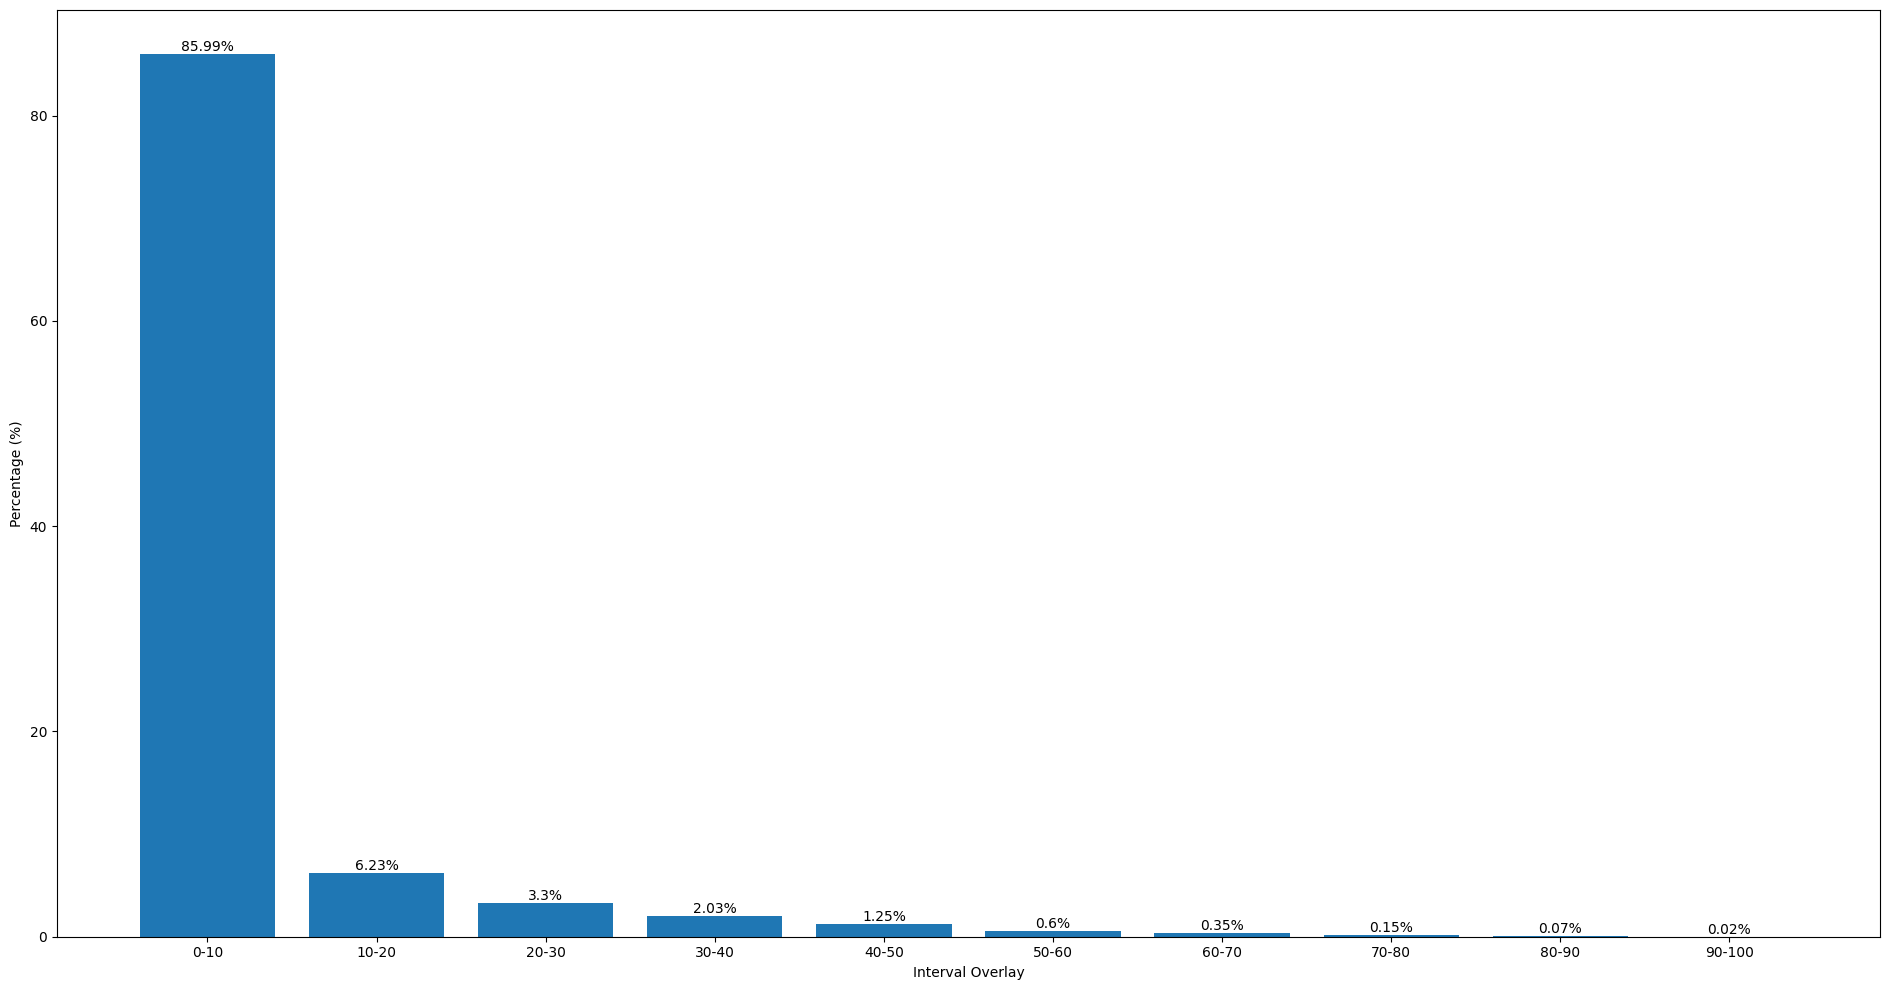

In [12]:
overlay_thresholds = [0] * 10
for iou in tqdm(bboxes_overlay_trainset, total=len(bboxes_overlay_trainset)):
    res = int(iou * 10)
    overlay_thresholds[res] += 1

percentages = [(overlay / len(bboxes_overlay_trainset)) * 100 for overlay in overlay_thresholds]
labels = [f'{i * 10}-{(i+1) * 10}' for i in range(len(overlay_thresholds))]

plt.figure(figsize=(19, 10))
barplot = plt.bar(range(len(overlay_thresholds)), percentages)
plt.bar_label(barplot, [f"{round(p, 2)}%" for p in percentages])
plt.xticks(range(len(overlay_thresholds)), [f'{i * 10}-{(i+1) * 10}' for i in range(len(overlay_thresholds))])
plt.xlabel("Interval Overlay")
plt.ylabel("Percentage (%)")
plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(""), "plots", f"Pascalvoc2012_overlay_bboxes_distribution"), pad_inches=0.)
plt.show()